In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.preprocessing import Normalizer 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier


In [2]:
filepath = 'C:\\allAccountsSending\\github projects\\KNearestNeighbour.csv'
data = pd.read_csv(filepath)
data

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0
...,...,...,...,...,...,...,...,...,...,...,...
995,1343.060600,1289.142057,407.307449,567.564764,1000.953905,919.602401,485.269059,668.007397,1124.772996,2127.628290,0
996,938.847057,1142.884331,2096.064295,483.242220,522.755771,1703.169782,2007.548635,533.514816,379.264597,567.200545,1
997,921.994822,607.996901,2065.482529,497.107790,457.430427,1577.506205,1659.197738,186.854577,978.340107,1943.304912,1
998,1157.069348,602.749160,1548.809995,646.809528,1335.737820,1455.504390,2788.366441,552.388107,1264.818079,1331.879020,1


In [6]:
data.describe()
data.columns

Index(['XVPM', 'GWYH', 'TRAT', 'TLLZ', 'IGGA', 'HYKR', 'EDFS', 'GUUB', 'MGJM',
       'JHZC', 'TARGET CLASS'],
      dtype='object')

In [21]:
input_data = data.drop('TARGET CLASS',axis=1)
targetY = data['TARGET CLASS']

input_array = input_data.values

rescaled_input = MinMaxScaler(feature_range = (0,1)).fit_transform(input_array)

normalized_input = Normalizer().fit(rescaled_input).transform(rescaled_input)


np.set_printoptions(precision=3)

normalized_inputX = pd.DataFrame(normalized_input, columns = input_data.columns)
normalized_inputX.describe()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.298514,0.273198,0.288181,0.352490,0.314218,0.333697,0.292811,0.247010,0.280501,0.281355
std,0.102011,0.107260,0.119099,0.097859,0.112254,0.104161,0.110390,0.106294,0.100774,0.107828
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.219421,0.190299,0.199453,0.288625,0.238436,0.264247,0.214669,0.170571,0.208265,0.205915
50%,0.299379,0.272595,0.292316,0.357763,0.316519,0.337348,0.295225,0.242219,0.286026,0.283296
75%,0.369005,0.348567,0.377920,0.421670,0.395360,0.406463,0.367676,0.318713,0.348182,0.358388
max,0.597020,0.559340,0.591752,0.575937,0.581689,0.603587,0.582375,0.581591,0.556403,0.541037


In [22]:
X_train, X_test, y_train, y_test = train_test_split(normalized_inputX, targetY , test_size=0.3, random_state=101)


knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [23]:
predictions = knn.predict(X_test)

print(confusion_matrix(y_test,predictions))

[[120  32]
 [ 36 112]]


In [24]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78       152
           1       0.78      0.76      0.77       148

    accuracy                           0.77       300
   macro avg       0.77      0.77      0.77       300
weighted avg       0.77      0.77      0.77       300



In [29]:
error_rate =[]
for i in range(1,70):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predictions = knn.predict(X_test)
    error_rate.append(np.mean(predictions != y_test))

Text(0, 0.5, 'Error Rate')

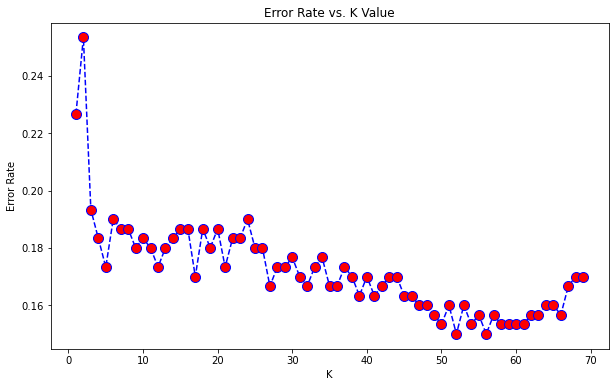

In [30]:


plt.figure(figsize=(10,6))
plt.plot(range(1,70),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')


In [32]:
knn = KNeighborsClassifier(n_neighbors=52)
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)

SyntaxError: unexpected EOF while parsing (1682995823.py, line 3)

In [33]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[124  28]
 [ 23 125]]
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       152
           1       0.82      0.84      0.83       148

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300

